# AL Model Choice

In [17]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns
from scipy.stats import friedmanchisquare
from statsmodels import robust
from scipy.stats import shapiro
from scipy.stats import spearmanr
from scipy.stats import kruskal
from scipy.stats import wilcoxon
import pingouin as pg

In [18]:
os.chdir("C:/Users/fionn/Documents/hard_to_find_papers_project/simulation_folders/multiple_models/Output/simulation/Radjenovic_2013_ndup_nnan/tables")

In [19]:
df_td = pd.read_csv("tds/data_tds.csv")
df_td = df_td.iloc[:,1:]

In [20]:
df_ranks = pd.read_csv("td_ranks/data_td_ranks.csv")
df_ranks = df_ranks.iloc[:,1:]

In [21]:
df_td = df_td.rename(columns={'record_id': 'Record ID', 'td_1': 'Log + Doc2Vec', 'td_2': 'Log + SBERT', 'td_3': 'Log + TF-IDF', 'td_4': 'NB + TF-IDF', 'td_5': 'RF + Doc2Vec', 'td_6': 'RF + SBERT', 'td_7': 'RF + TF-IDF', 'td_8': 'SVM + Doc2Vec', 'td_9': 'SVM + SBERT', 'td_10': 'SVM + TF-IDF'})
# sort AL models by feature-extractor
df_td = df_td[['Record ID', 'NB + TF-IDF', 'Log + TF-IDF', 'RF + TF-IDF', 'SVM + TF-IDF', 'Log + Doc2Vec', 'RF + Doc2Vec', 'SVM + Doc2Vec', 'Log + SBERT', 'RF + SBERT', 'SVM + SBERT', ]]

In [22]:
df_ranks = df_ranks.rename(columns={'record_id': 'Record ID', 'sim_1_ranks': 'Log + Doc2Vec', 'sim_2_ranks': 'Log + SBERT', 'sim_3_ranks': 'Log + TF-IDF', 'sim_4_ranks': 'NB + TF-IDF', 'sim_5_ranks': 'RF + Doc2Vec', 'sim_6_ranks': 'RF + SBERT', 'sim_7_ranks': 'RF + TF-IDF', 'sim_8_ranks': 'SVM + Doc2Vec', 'sim_9_ranks': 'SVM + SBERT', 'sim_10_ranks': 'SVM + TF-IDF'})
# sort AL models by feature-extractor
df_ranks = df_ranks[['Record ID', 'NB + TF-IDF', 'Log + TF-IDF', 'RF + TF-IDF', 'SVM + TF-IDF', 'Log + Doc2Vec', 'RF + Doc2Vec', 'SVM + Doc2Vec', 'Log + SBERT', 'RF + SBERT', 'SVM + SBERT', ]]

In [23]:
# Check assumption of normality - TD rank-orders

print(shapiro(df_td['Log + Doc2Vec']))
print(shapiro(df_td['Log + SBERT']))
print(shapiro(df_td['Log + TF-IDF']))
print(shapiro(df_td['NB + TF-IDF']))
print(shapiro(df_td['RF + Doc2Vec']))
print(shapiro(df_td['RF + SBERT']))
print(shapiro(df_td['RF + TF-IDF']))
print(shapiro(df_td['SVM + Doc2Vec']))
print(shapiro(df_td['SVM + SBERT']))
shapiro(df_td['SVM + TF-IDF']) 

# all groups distributions of TD values are non-normal

ShapiroResult(statistic=0.5186716318130493, pvalue=3.3918420155876206e-11)
ShapiroResult(statistic=0.7873015403747559, pvalue=8.336491532645596e-07)
ShapiroResult(statistic=0.7394766211509705, pvalue=8.89723423824762e-08)
ShapiroResult(statistic=0.6225728988647461, pvalue=9.353073870954631e-10)
ShapiroResult(statistic=0.42058151960372925, pvalue=2.266707871748097e-12)
ShapiroResult(statistic=0.7798603773117065, pvalue=5.777248475169472e-07)
ShapiroResult(statistic=0.7795933485031128, pvalue=5.702517000827356e-07)
ShapiroResult(statistic=0.5572983026504517, pvalue=1.0934043254140491e-10)
ShapiroResult(statistic=0.6919152736663818, pvalue=1.22131105229073e-08)


ShapiroResult(statistic=0.7289122939109802, pvalue=5.6189179531429545e-08)

## RQ1.1 What is the influence of active learning model choice (classifier and feature-extractor) on the variability of TD values and the stability of the rank-order of the TD values of the hardest-to-find papers?

In [24]:
# calcuate average-record-td
df_td['Average-Record-TD'] = df_td.iloc[:, 1:10].mean(axis=1)
df_td['Average-Record-TD'] = df_td['Average-Record-TD'].round(decimals=2)
# calculate SD of average-record-td
df_td['SD'] = df_td.iloc[:, 1:10].std(axis=1)
df_td['SD'] = df_td['SD'].round(decimals=2)

In [25]:
# save df_td as csv
df_td.to_csv("tds/data_tds.csv")

In [26]:
df_ranks['Median'] = df_ranks.iloc[:, 1:-3].median(axis=1)
df_ranks['Median'] = df_ranks['Median'].round(decimals=2)
df_ranks['IQR'] = df_ranks.iloc[:, 1:-4].quantile(q=0.75, axis=1) - df_ranks.iloc[:, 1:-4].quantile(q=0.25, axis=1)
df_ranks['IQR'] = df_ranks['IQR'].round(decimals=2)

In [27]:
# save df_ranks as csv
df_ranks.to_csv("td_ranks/data_td_ranks.csv")

In [28]:
# select top 5 hardest-to-find papers across models based on average-record-td
df_top_5_td = df_td.nlargest(5, ['Average-Record-TD']) # select top 5 rows based on mean
df_top_5_td

,Record ID,NB + TF-IDF,Log + TF-IDF,RF + TF-IDF,SVM + TF-IDF,Log + Doc2Vec,RF + Doc2Vec,SVM + Doc2Vec,Log + SBERT,RF + SBERT,SVM + SBERT,Average-Record-TD,SD
17,2312,1337,927,1554,1006,2708,3286,3119,793,412,881,1682.44,1075.64
44,5655,493,502,473,258,787,483,898,9,297,20,466.67,267.56
35,4826,460,565,689,530,115,110,239,467,563,165,415.33,209.59
25,3230,185,428,959,402,155,170,271,459,514,148,393.67,251.29
6,624,150,170,678,235,726,505,802,1,78,4,371.67,307.10


In [29]:
top_5_td_average = df_top_5_td['Record ID'].tolist() # add these record_ids to list
top_5_td_average

[2312, 5655, 4826, 3230, 624]

In [30]:
df_top_5_ranks = df_ranks[df_ranks['Record ID'].isin(top_5_td_average)]
df_top_5_ranks

,Record ID,NB + TF-IDF,Log + TF-IDF,RF + TF-IDF,SVM + TF-IDF,Log + Doc2Vec,RF + Doc2Vec,SVM + Doc2Vec,Log + SBERT,RF + SBERT,SVM + SBERT,Median,IQR
6,624,26,31,44,41,45,46,45,1,21,2,44.0,9.0
17,2312,47,47,47,47,47,47,47,47,42,47,47.0,0.0
25,3230,29,44,46,43,14,22,21,45,45,31,29.0,22.0
35,4826,45,46,45,46,11,17,19,46,46,32,45.0,27.5
44,5655,46,45,40,42,46,44,46,4,41,4,45.0,3.0


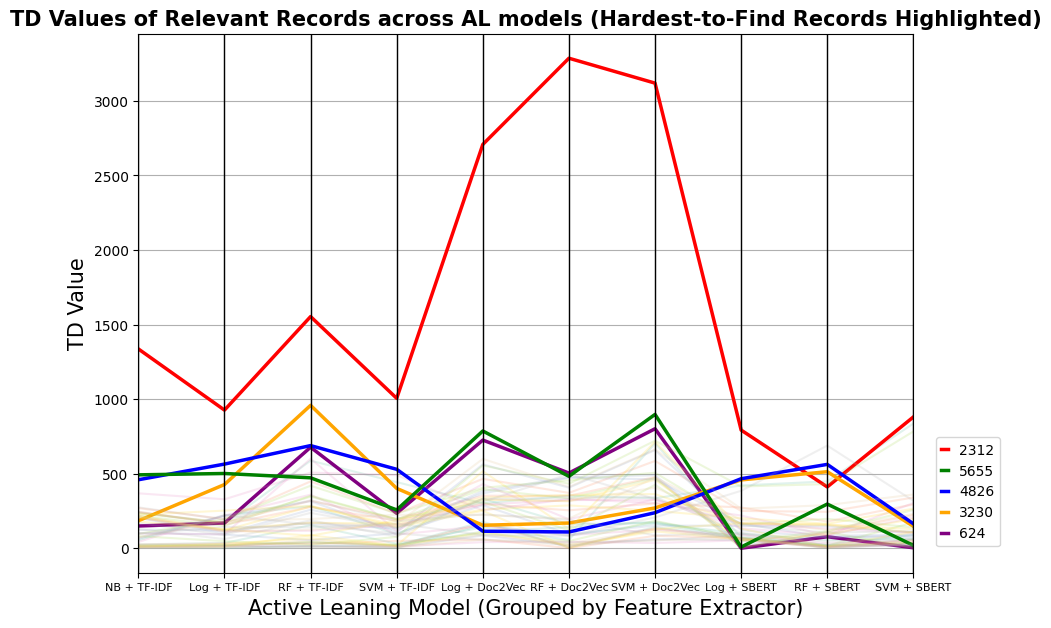

In [31]:
plt.figure(figsize=(10,7))
parallel_coordinates(df_td.iloc[:,:-2], 'Record ID', colormap=plt.get_cmap("Set2"))
# make legend of record ids
legend_labels = df_td['Record ID'].unique()
#top_5_labels = [label for label in legend_labels if label in top_5_td_average]
# Create custom legend handles and labels with the distinct colors
line_width = 2.5
# Define distinct colors for the top 5 labels
distinct_colors = ['red', 'green', 'blue', 'orange', 'purple']
# Create custom legend handles and labels with the distinct colors
custom_handles = [plt.Line2D([], [], color=color, lw=line_width) for color in distinct_colors[:len(top_5_td_average)]]
custom_labels = top_5_td_average
plt.legend(custom_handles, custom_labels, loc='center left', bbox_to_anchor=(1.02, 0.15), handlelength=0.5)
# title
plt.title('TD Values of Relevant Records across AL models (Hardest-to-Find Records Highlighted)', fontsize=15, fontweight='bold')
# x-axis label
plt.xlabel('Active Leaning Model (Grouped by Feature Extractor)', fontsize=15)
# y-axis label
plt.ylabel('TD Value', fontsize=15)

for i in range(len(legend_labels)):
    if legend_labels[i] in top_5_td_average:
        line = plt.gca().get_lines()[i]
        line.set_alpha(1)  # Set alpha to 1 (fully visible)
        line.set_linewidth(line_width)  # Increase line thickness
        label_index = np.where(top_5_td_average == legend_labels[i])[0][0]  # Get the index of the label in top_5_labels
        line.set_color(distinct_colors[label_index])  # Set color based on index

    else:
        plt.gca().get_lines()[i].set_alpha(0.2)  # Set alpha to 0.1 (more transparent)

plt.xticks(fontsize=8)

plt.show()

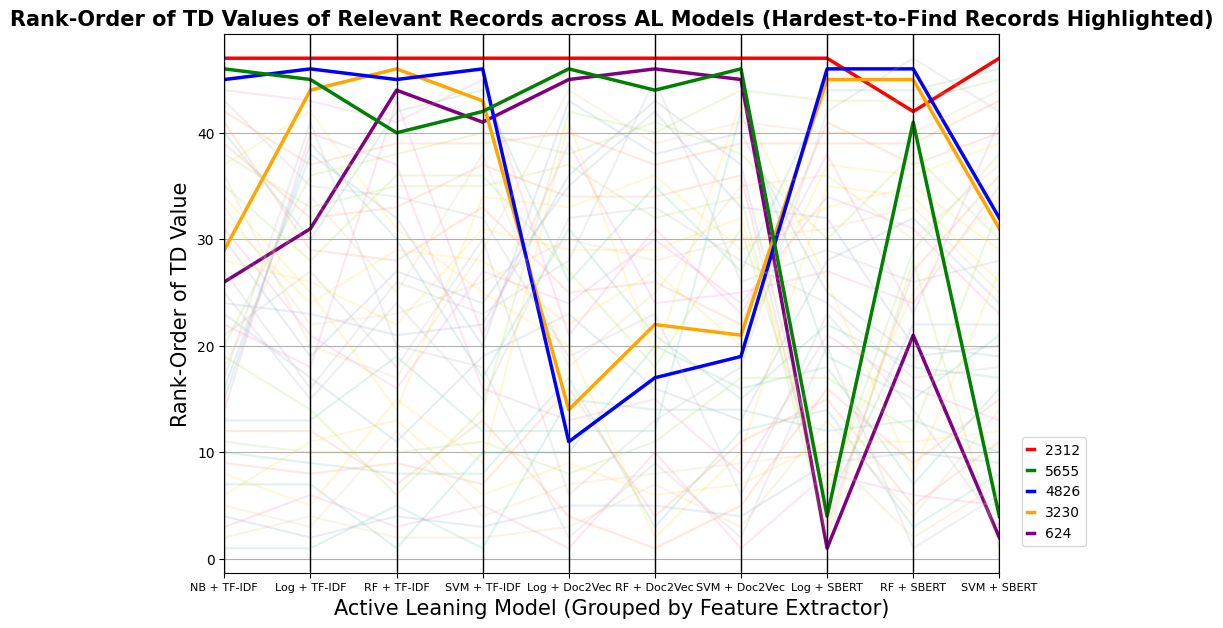

In [32]:
plt.figure(figsize=(10,7))
parallel_coordinates(df_ranks.iloc[:,:-2], 'Record ID', colormap=plt.get_cmap("Set2"))
# make legend of record ids
legend_labels = df_ranks['Record ID'].unique()
#top_5_labels = [label for label in legend_labels if label in top_5_td_average]
# Create custom legend handles and labels with the distinct colors
line_width = 2.5
# Define distinct colors for the top 5 labels
distinct_colors = ['red', 'green', 'blue', 'orange', 'purple']
# Create custom legend handles and labels with the distinct colors
custom_handles = [plt.Line2D([], [], color=color, lw=line_width) for color in distinct_colors[:len(top_5_td_average)]]
custom_labels = top_5_td_average
plt.legend(custom_handles, custom_labels, loc='center left', bbox_to_anchor=(1.02, 0.15), handlelength=0.5)
# title
plt.title('Rank-Order of TD Values of Relevant Records across AL Models (Hardest-to-Find Records Highlighted)', fontsize=15, fontweight='bold')
# x-axis label
plt.xlabel('Active Leaning Model (Grouped by Feature Extractor)', fontsize=15)
# y-axis label
plt.ylabel('Rank-Order of TD Value', fontsize=15)

for i in range(len(legend_labels)):
    if legend_labels[i] in top_5_td_average:
        line = plt.gca().get_lines()[i]
        line.set_alpha(1)  # Set alpha to 1 (fully visible)
        line.set_linewidth(line_width)  # Increase line thickness
        label_index = np.where(top_5_td_average == legend_labels[i])[0][0]  # Get the index of the label in top_5_labels
        line.set_color(distinct_colors[label_index])  # Set color based on index

    else:
        plt.gca().get_lines()[i].set_alpha(0.2)  # Set alpha to 0.1 (more transparent)

plt.xticks(fontsize=8)

plt.show()

In [33]:
# perform the shapiro test
stat, p = shapiro(df_td['Average-Record-TD'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# data is non-normal 

# perform the shapiro test
stat, p = shapiro(df_td['SD'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# data is non-normal 

Statistics=0.551, p=0.000
Statistics=0.546, p=0.000


In [34]:
spearmanr(df_td['Average-Record-TD'], df_td['SD'])

SignificanceResult(statistic=0.8175300647548566, pvalue=2.3500823241851965e-12)

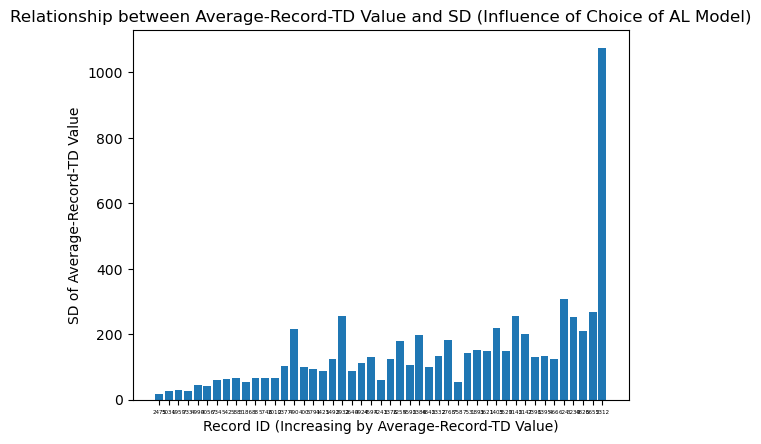

In [ ]:
# barchart of record id increasing by mean value on x-axis and SD on y-axis
sorted_df = df_td.sort_values(by='Average-Record-TD')
sorted_record_ids = sorted_df['Record ID']
SD = sorted_df['SD']
# Create an array for the x-axis positions
x_pos = np.arange(len(sorted_record_ids))
plt.bar(x_pos, SD)
plt.xticks(x_pos, sorted_record_ids)
plt.xlabel('Record ID (Increasing by Average-Record-TD Value)')
# make font of x axis smaller 
plt.xticks(fontsize=4)
plt.ylabel('SD of Average-Record-TD Value')
plt.title('Relationship between Average-Record-TD Value and SD (Influence of Choice of AL Model)')
plt.show()


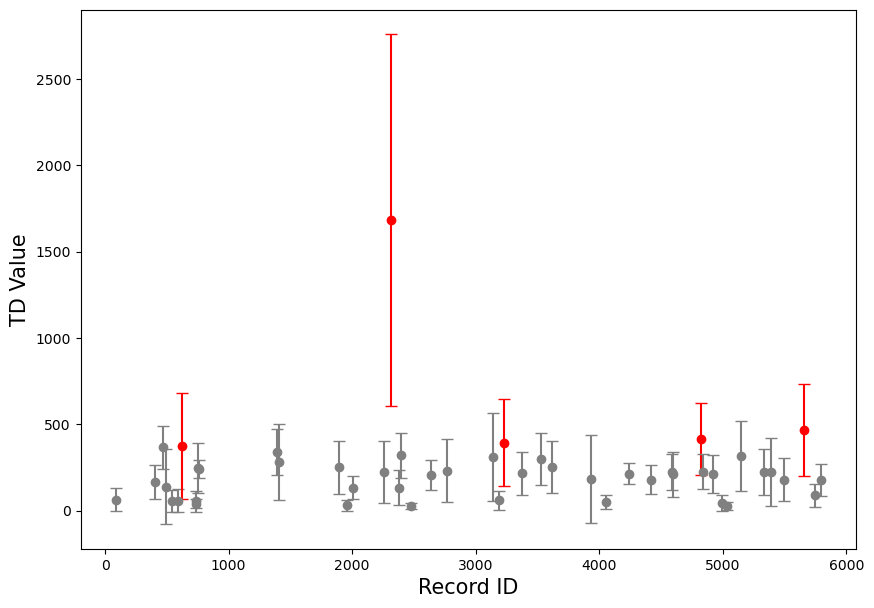

In [ ]:
plt.figure(figsize=(10,7))

for i, row in df_td.iterrows():
    record = row['Record ID']
    if record in top_5_td_average:
        plt.errorbar(record, row['Average-Record-TD'], yerr=row['SD'], fmt='o', capsize=4, color='red')
    else:
        plt.errorbar(record, row['Average-Record-TD'], yerr=row['SD'], fmt='o', capsize=4, color = 'grey')
                     
#plt.errorbar(df_td['Record ID'], df_td['Average-Record-TD'], yerr=df_td['SD'], fmt='o', capsize=4)

#plt.title('Standard Deviation and Average-Record-TD of Relevant Records')
plt.xlabel('Record ID', fontsize=15)
plt.ylabel('TD Value', fontsize=15)
plt.show()

## RQ1.2 What is the influence of the AL model choice on the variability of the TD values and the stability of the ranks of the TD values across the entire dataset?

In [ ]:
long_data = pd.melt(
    df_td.iloc[:,:-2],
    id_vars = ['Record ID'],
    var_name = 'AL_Model',
    value_name = 'TD_Value'
)

# add column which specifies feature extractor used
long_data['Classifier'] = long_data['AL_Model'].apply(lambda x: x.split(' + ')[0])
long_data['Feature_Extractor'] = long_data['AL_Model'].apply(lambda x: x.split(' + ')[1])
long_data

,Record ID,AL_Model,TD_Value,Classifier,Feature_Extractor
0,88,NB + TF-IDF,10,NB,TF-IDF
1,400,NB + TF-IDF,55,NB,TF-IDF
2,466,NB + TF-IDF,243,NB,TF-IDF
3,490,NB + TF-IDF,27,NB,TF-IDF
4,542,NB + TF-IDF,18,NB,TF-IDF
...,...,...,...,...,...
465,5386,SVM + SBERT,319,SVM,SBERT
466,5492,SVM + SBERT,66,SVM,SBERT
467,5655,SVM + SBERT,20,SVM,SBERT
468,5746,SVM + SBERT,26,SVM,SBERT


In [ ]:
pg.friedman(data=long_data, dv="TD_Value", within="AL_Model", subject="Record ID")

,Source,W,ddof1,Q,p-unc
Friedman,AL_Model,0.328796,9,139.080558,1.597032e-25


In [ ]:

pg.friedman(data=long_data, dv="TD_Value", within="Feature_Extractor", subject="Record ID")

,Source,W,ddof1,Q,p-unc
Friedman,Feature_Extractor,0.378904,2,35.617021,1.844430e-08


In [ ]:
alpha = 0.05  # significance level
bonferroni_alpha = alpha / 3  # Bonferroni corrected alpha level for 3 comparisons (3 = number of pairwise comparisons)

# Perform Wilcoxon signed-rank test and check significance for each comparison
pairs = [('TF-IDF', 'Doc2Vec'), ('Doc2Vec', 'SBERT'), ('TF-IDF', 'SBERT')]
for pair in pairs:
    stat, p = wilcoxon(feature_data[pair[0]], feature_data[pair[1]])
    if p < bonferroni_alpha:
        print(f"Pair {pair}: statistic = {stat: .4f}, p-value = {p:.4f} (Significant)")
    else:
        print(f"Pair {pair}: statistic = {stat: .4f}, p-value = {p:.4f} (Not significant)")

Pair ('TF-IDF', 'Doc2Vec'): statistic =  171.0000, p-value = 0.0000 (Significant)
Pair ('Doc2Vec', 'SBERT'): statistic =  133.0000, p-value = 0.0000 (Significant)
Pair ('TF-IDF', 'SBERT'): statistic =  383.0000, p-value = 0.0556 (Not significant)


In [ ]:
pg.friedman(data=long_data, dv="TD_Value", within="Classifier", subject="Record ID")

,Source,W,ddof1,Q,p-unc
Friedman,Classifier,0.174106,3,24.548936,0.000019


In [ ]:
alpha = 0.05  # significance level
bonferroni_alpha = alpha / 6  # Bonferroni corrected alpha level for 6 comparisons (6 = number of pairwise comparisons)

# Perform Wilcoxon signed-rank test and check significance for each comparison
results = []
pairs = [('NB', 'Log'), ('Log', 'RF'), ('RF', 'SVM'), ('NB', 'RF'), ('NB', 'SVM'), ('Log', 'SVM')]
for pair in pairs:
    stat, p = wilcoxon(classifier_data[pair[0]], classifier_data[pair[1]])
    if p < bonferroni_alpha:
        results.append(f"Pair {pair}: statistic = {stat: .4f}, p-value = {p:.4f} (Significant)")
    else:
        results.append(f"Pair {pair}: statistic = {stat: .4f}, p-value = {p:.4f} (Not significant)")

# Print the results
for result in results:
    print(result)

Pair ('NB', 'Log'): statistic =  220.0000, p-value = 0.0002 (Significant)
Pair ('Log', 'RF'): statistic =  487.5000, p-value = 0.4217 (Not significant)
Pair ('RF', 'SVM'): statistic =  489.0000, p-value = 0.4340 (Not significant)
Pair ('NB', 'RF'): statistic =  192.5000, p-value = 0.0000 (Significant)
Pair ('NB', 'SVM'): statistic =  146.0000, p-value = 0.0000 (Significant)
Pair ('Log', 'SVM'): statistic =  385.5000, p-value = 0.0584 (Not significant)


In [ ]:
friedmanchisquare(df_td['Log + Doc2Vec'], df_td['Log + SBERT'], df_td['Log + TF-IDF'], df_td['NB + TF-IDF'], df_td['RF + Doc2Vec'], df_td['RF + SBERT'], df_td['RF + TF-IDF'], df_td['SVM + Doc2Vec'], df_td['SVM + SBERT'], df_td['SVM + TF-IDF'])

FriedmanchisquareResult(statistic=139.08055770720364, pvalue=1.5970319434255743e-25)

In [ ]:
df_td_models = df_td.iloc[:, 1:11]
columns = df_td_models.columns

alpha = 0.05  # Significance level

significance_matrix = np.zeros((len(columns), len(columns)), dtype=bool)

p_values = np.zeros((len(columns), len(columns)))

for i in range(df_td_models.shape[1]):
    for j in range(df_td_models.shape[1]):
        if i != j:
            condition1_data = df_td_models.iloc[:, i].values
            condition2_data = df_td_models.iloc[:, j].values
            statistic, p_value = wilcoxon(condition1_data, condition2_data)
            corrected_alpha = alpha / (df_td_models.shape[1] * (df_td_models.shape[1] - 1) / 2)
            p_values[i, j] = p_value

            if p_value < corrected_alpha:
                significance_matrix[i, j] = True

p_values_df = pd.DataFrame(p_values, columns=columns, index=columns)

# Add asterisks to the significance values in p_values_df
for i in range(df_td_models.shape[1]):
    for j in range(df_td_models.shape[1]):
        if i != j:
            significance = f"{p_values_df.iloc[i, j]:.4f}"
            if p_values_df.iloc[i, j] < corrected_alpha:
                significance += "*"
            p_values_df.iloc[i, j] = significance

print("Significant differences:")
for i in range(df_td_models.shape[1]):
    for j in range(i + 1, df_td_models.shape[1]):
        if significance_matrix[i, j]:
            print(f"{columns[i]} vs {columns[j]} (p-value: {p_values_df.iloc[i, j]})")

print("\np_values_df:")
print(p_values_df)



Significant differences:
NB + TF-IDF vs RF + TF-IDF (p-value: 0.0000*)
NB + TF-IDF vs Log + Doc2Vec (p-value: 0.0000*)
NB + TF-IDF vs RF + Doc2Vec (p-value: 0.0000*)
NB + TF-IDF vs SVM + Doc2Vec (p-value: 0.0000*)
Log + TF-IDF vs RF + TF-IDF (p-value: 0.0000*)
Log + TF-IDF vs Log + Doc2Vec (p-value: 0.0000*)
Log + TF-IDF vs SVM + Doc2Vec (p-value: 0.0000*)
RF + TF-IDF vs SVM + TF-IDF (p-value: 0.0000*)
RF + TF-IDF vs RF + SBERT (p-value: 0.0000*)
SVM + TF-IDF vs Log + Doc2Vec (p-value: 0.0000*)
SVM + TF-IDF vs RF + Doc2Vec (p-value: 0.0008*)
SVM + TF-IDF vs SVM + Doc2Vec (p-value: 0.0000*)
Log + Doc2Vec vs SVM + Doc2Vec (p-value: 0.0009*)
Log + Doc2Vec vs Log + SBERT (p-value: 0.0000*)
Log + Doc2Vec vs RF + SBERT (p-value: 0.0000*)
Log + Doc2Vec vs SVM + SBERT (p-value: 0.0000*)
RF + Doc2Vec vs SVM + Doc2Vec (p-value: 0.0000*)
RF + Doc2Vec vs RF + SBERT (p-value: 0.0001*)
SVM + Doc2Vec vs Log + SBERT (p-value: 0.0000*)
SVM + Doc2Vec vs RF + SBERT (p-value: 0.0000*)
SVM + Doc2Vec vs SVM

c:\Users\fionn\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [ ]:
print(p_values_df)
# save
p_values_df.to_csv('p_values_df.csv')

              NB + TF-IDF Log + TF-IDF RF + TF-IDF SVM + TF-IDF Log + Doc2Vec   
NB + TF-IDF           0.0       0.5121     0.0000*       0.9820       0.0000*  \
Log + TF-IDF       0.5121          0.0     0.0000*       0.0264       0.0000*   
RF + TF-IDF       0.0000*      0.0000*         0.0      0.0000*        0.0114   
SVM + TF-IDF       0.9820       0.0272     0.0000*          0.0       0.0000*   
Log + Doc2Vec     0.0000*      0.0000*      0.0118      0.0000*           0.0   
RF + Doc2Vec      0.0000*       0.0012      0.9707      0.0009*        0.0017   
SVM + Doc2Vec     0.0000*      0.0000*      0.0051      0.0000*       0.0009*   
Log + SBERT        0.4037       0.9875      0.0015       0.5962       0.0000*   
RF + SBERT         0.0529       0.1410     0.0000*       0.0177       0.0000*   
SVM + SBERT        0.8298       0.6036      0.0063       0.9207       0.0000*   

              RF + Doc2Vec SVM + Doc2Vec Log + SBERT RF + SBERT SVM + SBERT  
NB + TF-IDF        0.0000*    

In [ ]:
# p-values table
p_values = np.zeros((len(columns), len(columns)))

for i in range(df_td_models.shape[1]):
    for j in range(i+1, df_td_models.shape[1]):
        condition1_data = df_td_models.iloc[:, i].values
        condition2_data = df_td_models.iloc[:, j].values
        statistic, p_value = wilcoxon(condition1_data, condition2_data)
        p_values[i, j] = p_value

p_values_df = pd.DataFrame(p_values, columns=columns, index=columns)
print(p_values_df)

## RQ2.1 What is the influence of prior knowledge on the variability of the TD values and the stability of the ranks of the TD values of the hardest-to-find papers?

In [36]:
os.chdir("C:/Users/fionn/Documents/hard_to_find_papers_project/simulation_folders/sim_thesis_ATD_arfi/Output/simulation/Radjenovic_2013_ndup_nnan/tables")

In [37]:
df_td = pd.read_csv("tds/data_tds.csv")
df_td = df_td.iloc[:,1:]

In [38]:
zero_values = []

# Iterate over the rows and columns of the DataFrame
for index, row in df_td.iterrows():
    for col_label, value in row.items():
        if value == 0:
            record_id = row['record_id']  # Retrieve the record ID value from the 'RecordID' column
            zero_values.append((record_id, col_label))
            
# take the first element from the tuples in the list
zero_values = [i[0] for i in zero_values]

# rename columns of td dataframe with number plus td
df_td.columns = df_td.columns[:1].tolist() + zero_values

In [39]:
df_ranks = pd.read_csv("td_ranks/data_td_ranks.csv")
df_ranks = df_ranks.iloc[:,1:]
df_ranks.columns = df_ranks.columns[:1].tolist() + zero_values

In [40]:
df_ranks = df_ranks.replace(0, np.nan)
df_td = df_td.replace(0, np.nan) # replace 0 values with nan - these records are prior knowledge

In [41]:
df_td = df_td.rename(columns={'record_id': 'Record ID'})
df_ranks = df_ranks.rename(columns={'record_id': 'Record ID'})

In [42]:
# test for normality of td values 

# create a list of the columns to be used in the shapiro test
cols = df_td.columns[2:].tolist()

# remove nan from column and add to list
data = [df_td[col].dropna().tolist() for col in cols]

# perform the shapiro test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# data is non-normal 

Statistics=0.603, p=0.000


In [43]:
# calcuate average-record-td
df_td['Average-Record-TD'] = df_td.iloc[:, 1:10].mean(axis=1)
df_td['Average-Record-TD'] = df_td['Average-Record-TD'].round(decimals=2)
# calculate SD of average-record-td
df_td['SD'] = df_td.iloc[:, 1:10].std(axis=1)
df_td['SD'] = df_td['SD'].round(decimals=2)


In [44]:
df_ranks['Median'] = df_ranks.iloc[:, 1:-3].median(axis=1)
df_ranks['Median'] = df_ranks['Median'].round(decimals=2)
df_ranks['IQR'] = df_ranks.iloc[:, 1:-4].quantile(q=0.75, axis=1) - df_ranks.iloc[:, 1:-4].quantile(q=0.25, axis=1)
df_ranks['IQR'] = df_ranks['IQR'].round(decimals=2)

In [45]:
# select top 5 hardest-to-find papers across models based on average-record-td
df_top_5_td = df_td.nlargest(5, ['Average-Record-TD']) # select top 5 rows based on mean
df_top_5_td

,Record ID,88,400,466,490,542,588,624,733,734,...,5034,5147,5332,5386,5492,5655,5746,5791,Average-Record-TD,SD
18,2312,1318.0,1294.0,1331.0,1322.0,1322.0,1279.0,1342.0,1336.0,1322.0,...,1318.0,1352.0,1318.0,1343.0,1338.0,1257.0,1294.0,1358.0,1318.44,20.04
45,5655,522.0,528.0,559.0,526.0,526.0,518.0,547.0,496.0,526.0,...,522.0,508.0,520.0,524.0,551.0,NaN,528.0,505.0,527.56,17.65
36,4826,466.0,508.0,398.0,465.0,465.0,480.0,449.0,466.0,465.0,...,466.0,513.0,479.0,451.0,476.0,502.0,508.0,466.0,462.44,29.07
20,2398,349.0,389.0,333.0,381.0,381.0,379.0,342.0,287.0,381.0,...,349.0,378.0,361.0,353.0,378.0,379.0,389.0,334.0,358.00,33.53
47,5791,276.0,289.0,266.0,279.0,279.0,284.0,258.0,307.0,279.0,...,276.0,258.0,275.0,271.0,272.0,261.0,289.0,NaN,279.67,13.80


In [47]:
# save to csv
df_top_5_td.to_csv('df_top_5_td_arfi.csv')

In [25]:
top_5_td_nb = df_top_5_td['Record ID'].tolist() # add these record_ids to list
top_5_td_nb

[2312, 5655, 4826, 2398, 5791]

In [26]:
df_top_5_ranks = df_ranks[df_ranks['Record ID'].isin(top_5_td_nb)]
df_top_5_ranks = df_top_5_ranks.sort_values(by = 88, ascending=False)
df_top_5_ranks

,Record ID,88,400,466,490,542,588,624,733,734,...,5034,5147,5332,5386,5492,5655,5746,5791,Median,IQR
18,2312,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0,...,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0,0.0
45,5655,46.0,46.0,46.0,46.0,46.0,46.0,46.0,46.0,46.0,...,46.0,45.0,46.0,46.0,46.0,NaN,46.0,46.0,46.0,0.0
36,4826,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,...,45.0,46.0,45.0,45.0,45.0,46.0,45.0,45.0,45.0,0.0
20,2398,44.0,44.0,44.0,44.0,44.0,44.0,44.0,43.0,44.0,...,44.0,44.0,44.0,44.0,44.0,45.0,44.0,44.0,44.0,0.0
47,5791,43.0,43.0,42.0,43.0,43.0,43.0,41.0,44.0,43.0,...,43.0,41.0,42.0,42.0,43.0,42.0,43.0,NaN,42.0,1.0


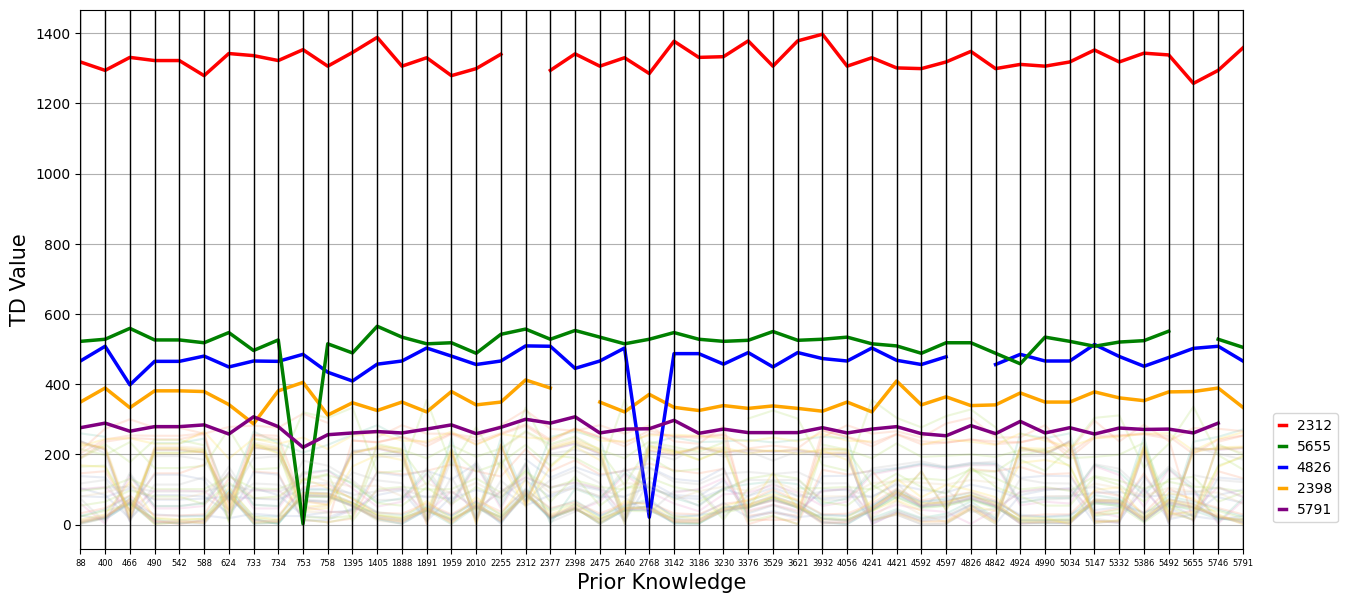

In [30]:
plt.figure(figsize=(15,7))
parallel_coordinates(df_td.iloc[:,:-2], 'Record ID', colormap=plt.get_cmap("Set2"))
# make legend of record ids
legend_labels = df_td['Record ID'].unique()
#top_5_labels = [label for label in legend_labels if label in top_5_td_average]
# Create custom legend handles and labels with the distinct colors
line_width = 2.5
# Define distinct colors for the top 5 labels
distinct_colors = ['red', 'green', 'blue', 'orange', 'purple']
# Create custom legend handles and labels with the distinct colors
custom_handles = [plt.Line2D([], [], color=color, lw=line_width) for color in distinct_colors[:len(top_5_td_nb)]]
custom_labels = top_5_td_nb
plt.legend(custom_handles, custom_labels, loc='center left', bbox_to_anchor=(1.02, 0.15), handlelength=0.5)
plt.title('TD Values of Relevant Records across Prior Knowledge (Hardest-to-Find Records Highlighted)', fontsize=15, fontweight='bold')
# x-axis label
plt.xlabel('Prior Knowledge', fontsize=15)
# y-axis label
plt.ylabel('TD Value', fontsize=15)

for i in range(len(legend_labels)):
    if legend_labels[i] in top_5_td_nb:
        line = plt.gca().get_lines()[i]
        line.set_alpha(1)  # Set alpha to 1 (fully visible)
        line.set_linewidth(line_width)  # Increase line thickness
        label_index = np.where(top_5_td_nb == legend_labels[i])[0][0]  # Get the index of the label in top_5_labels
        line.set_color(distinct_colors[label_index])  # Set color based on index

    else:
        plt.gca().get_lines()[i].set_alpha(0.2)  # Set alpha to 0.1 (more transparent)

plt.xticks(fontsize=6)

plt.show()

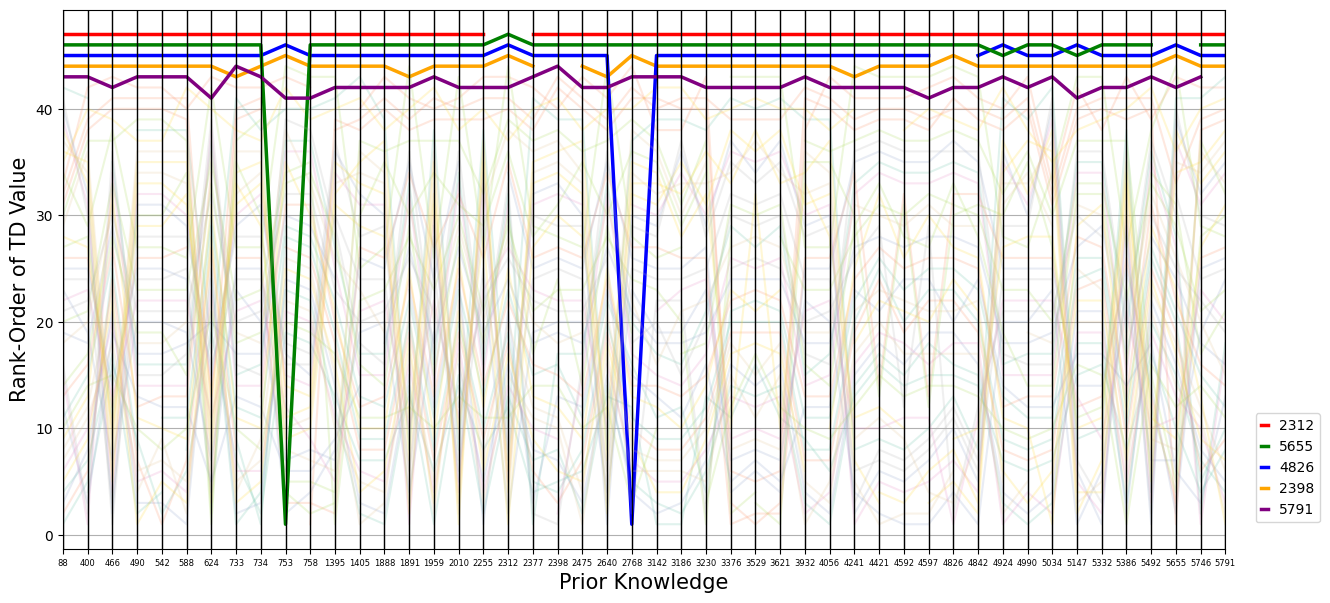

In [31]:
plt.figure(figsize=(15,7))
parallel_coordinates(df_ranks.iloc[:,:-2], 'Record ID', colormap=plt.get_cmap("Set2"))
# make legend of record ids
legend_labels = df_ranks['Record ID'].unique()
#top_5_labels = [label for label in legend_labels if label in top_5_td_average]
# Create custom legend handles and labels with the distinct colors
line_width = 2.5
# Define distinct colors for the top 5 labels
distinct_colors = ['red', 'green', 'blue', 'orange', 'purple']
# Create custom legend handles and labels with the distinct colors
custom_handles = [plt.Line2D([], [], color=color, lw=line_width) for color in distinct_colors[:len(top_5_td_nb)]]
custom_labels = top_5_td_nb
plt.legend(custom_handles, custom_labels, loc='center left', bbox_to_anchor=(1.02, 0.15), handlelength=0.5)
plt.title('Rank-Order of TD Values of Relevant Records across Prior Knowledge (Hardest-to-Find Records Highlighted)', fontsize=15, fontweight='bold')
# x-axis label
plt.xlabel('Prior Knowledge', fontsize=15)
# y-axis label
plt.ylabel('Rank-Order of TD Value', fontsize=15)

for i in range(len(legend_labels)):
    if legend_labels[i] in top_5_td_nb:
        line = plt.gca().get_lines()[i]
        line.set_alpha(1)  # Set alpha to 1 (fully visible)
        line.set_linewidth(line_width)  # Increase line thickness
        label_index = np.where(top_5_td_nb == legend_labels[i])[0][0]  # Get the index of the label in top_5_labels
        line.set_color(distinct_colors[label_index])  # Set color based on index

    else:
        plt.gca().get_lines()[i].set_alpha(0.2)  # Set alpha to 0.1 (more transparent)

plt.xticks(fontsize=6)

plt.show()

In [38]:
# perform the shapiro test
stat, p = shapiro(df_td['Average-Record-TD'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# data is non-normal 

# perform the shapiro test
stat, p = shapiro(df_td['SD'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# data is non-normal 

Statistics=0.576, p=0.000
Statistics=0.889, p=0.000


In [40]:
spearmanr(df_td['Average-Record-TD'], df_td['SD'])

SpearmanrResult(correlation=0.1934485847592755, pvalue=0.18770236504749938)

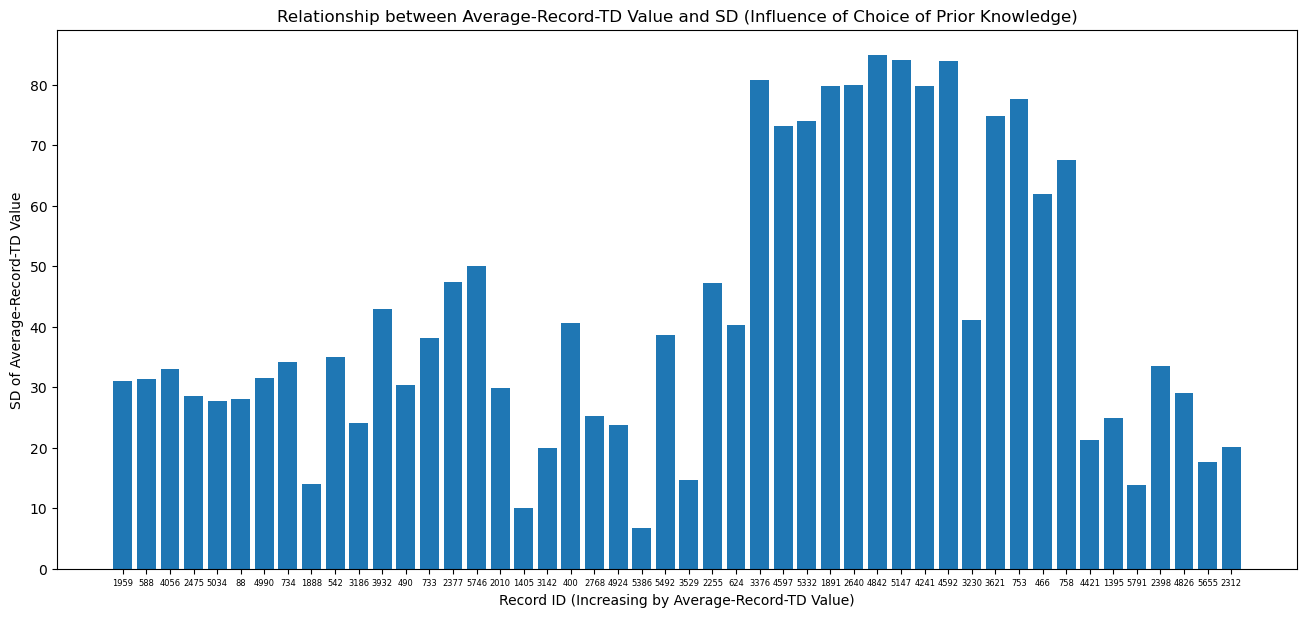

In [35]:
# barchart of record id increasing by mean value on x-axis and SD on y-axis
sorted_df = df_td.sort_values(by='Average-Record-TD')
sorted_record_ids = sorted_df['Record ID']
SD = sorted_df['SD']
# Create an array for the x-axis positions
x_pos = np.arange(len(sorted_record_ids))
plt.figure(figsize=(16,7))
plt.bar(x_pos, SD)
plt.xticks(x_pos, sorted_record_ids)
plt.xlabel('Record ID (Increasing by Average-Record-TD Value)')
# make font of x axis smaller 
plt.xticks(fontsize=6)
plt.ylabel('SD of Average-Record-TD Value')
plt.title('Relationship between Average-Record-TD Value and SD (Influence of Choice of Prior Knowledge)')
plt.show()

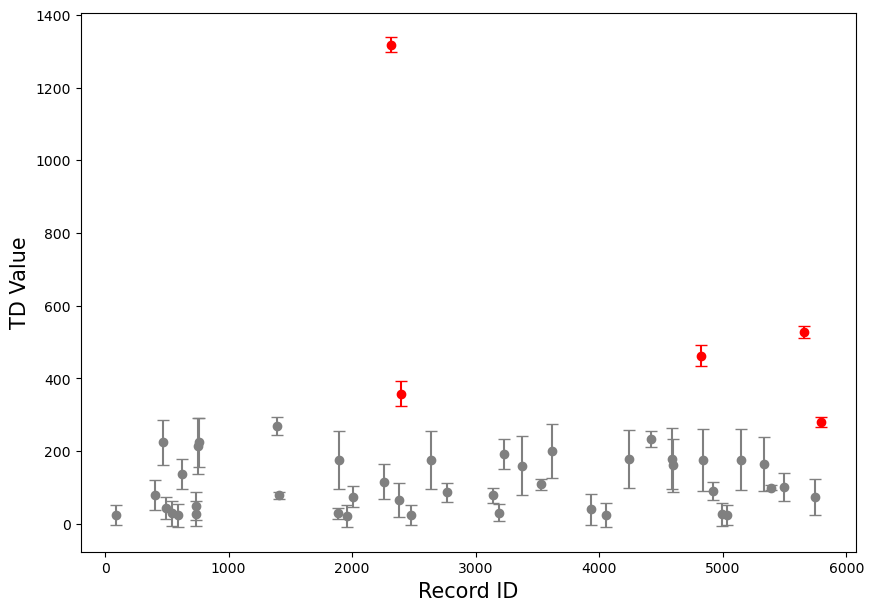

In [36]:
plt.figure(figsize=(10,7))

for i, row in df_td.iterrows():
    record = row['Record ID']
    if record in top_5_td_nb:
        plt.errorbar(record, row['Average-Record-TD'], yerr=row['SD'], fmt='o', capsize=4, color='red')
    else:
        plt.errorbar(record, row['Average-Record-TD'], yerr=row['SD'], fmt='o', capsize=4, color = 'grey')
                     
#plt.errorbar(df_td['Record ID'], df_td['Average-Record-TD'], yerr=df_td['SD'], fmt='o', capsize=4)

#plt.title('Standard Deviation and Average-Record-TD of Relevant Records')
plt.xlabel('Record ID', fontsize=15)
plt.ylabel('TD Value', fontsize=15)
plt.show()

## RQ2.2 What is the influence of prior knowledge on the TD values and the stability of the ranks of the TD values across the entire dataset?

In [37]:
# create a list of the columns to be used in the kruskal wallis test
cols = df_td.columns[1:-2].tolist()
# remove nan from column and add to list 
data_tds = [df_td[col].dropna().tolist() for col in cols]

stat, p = kruskal(*data_tds)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=35.786, p=0.884
